In [1]:
import pandas as pd
import numpy as np
from os.path import expanduser
import json
import matplotlib.pyplot as plt

### number of peptides

#### P3856

In [2]:
run_name = 'P3856_YHE211_1_Slot1-1_1_5104'

##### Biosaur

In [3]:
biosaur_base_name = '{}-denoised-biosaur'.format(run_name)
biosaur_pfms_df = pd.read_csv('{}/{}.features_PFMs.tsv'.format('~',biosaur_base_name), sep='\t')
biosaur_proteins_full_df = pd.read_csv('{}/{}.features_proteins_full.tsv'.format('~',biosaur_base_name), sep='\t')

In [4]:
# estimate the probability of a random match for theoretical peptides
# p = sum(all decoy peptides from *_PFMs.tsv) / sum(theoretical decoy peptides from *_proteins_full.tsv)
biosaur_probability_random_match = len(biosaur_pfms_df[biosaur_pfms_df.proteins.str.contains('DECOY')].sequence) / biosaur_proteins_full_df[biosaur_proteins_full_df.dbname.str.contains('DECOY')]['theoretical peptides'].sum()
biosaur_probability_random_match

0.006479691273187511

In [5]:
biosaur_target_proteins_full_df = biosaur_proteins_full_df[~biosaur_proteins_full_df.dbname.str.contains('DECOY')].copy()

In [6]:
biosaur_target_proteins_full_df['est_false_peptides'] = (biosaur_target_proteins_full_df['theoretical peptides'] * biosaur_probability_random_match).astype(int)

In [7]:
biosaur_target_proteins_full_df['corrected_matched_peptides'] = biosaur_target_proteins_full_df['matched peptides'] - (biosaur_target_proteins_full_df['matched peptides']*biosaur_probability_random_match).astype(int)

In [8]:
biosaur_target_proteins_full_df

,dbname,score,matched peptides,theoretical peptides,est_false_peptides,corrected_matched_peptides
0,sp|P14540|ALF_YEAST,10.235853,7,14,0,7
1,sp|P07437|TBB5_HUMAN,9.134477,8,19,0,8
2,sp|P00549|KPYK1_YEAST,9.047875,7,27,0,7
3,sp|P06733|ENOA_HUMAN,8.340804,8,22,0,8
4,sp|P00558|PGK1_HUMAN,7.893513,7,25,0,7
...,...,...,...,...,...,...
63039,sp|Q9NP31|SH22A_HUMAN,0.000000,0,17,0,0
63040,sp|O95707|RPP29_HUMAN,0.000000,0,9,0,0
63041,sp|Q9NQG5|RPR1B_HUMAN,0.000000,0,14,0,0
63042,sp|Q92753|RORB_HUMAN,0.000000,0,23,0,0


In [9]:
biosaur_target_proteins_full_df.corrected_matched_peptides.sum()

5108

##### 3DID

In [10]:
tdid_base_name = '{}-3did'.format(run_name)
tdid_pfms_df = pd.read_csv('{}/{}.features_PFMs.tsv'.format('~',tdid_base_name), sep='\t')
tdid_proteins_full_df = pd.read_csv('{}/{}.features_proteins_full.tsv'.format('~',tdid_base_name), sep='\t')

In [11]:
# estimate the probability of a random match for theoretical peptides
# p = sum(all decoy peptides from *_PFMs.tsv) / sum(theoretical decoy peptides from *_proteins_full.tsv)
tdid_probability_random_match = len(tdid_pfms_df[tdid_pfms_df.proteins.str.contains('DECOY')].sequence) / tdid_proteins_full_df[tdid_proteins_full_df.dbname.str.contains('DECOY')]['theoretical peptides'].sum()
tdid_probability_random_match

0.626207760736514

In [12]:
tdid_target_proteins_full_df = tdid_proteins_full_df[~tdid_proteins_full_df.dbname.str.contains('DECOY')].copy()

In [13]:
tdid_target_proteins_full_df['est_false_peptides'] = (tdid_target_proteins_full_df['theoretical peptides'] * tdid_probability_random_match).astype(int)

In [14]:
tdid_target_proteins_full_df['corrected_matched_peptides'] = tdid_target_proteins_full_df['matched peptides'] - (tdid_target_proteins_full_df['matched peptides']*tdid_probability_random_match).astype(int)

In [15]:
tdid_target_proteins_full_df

,dbname,score,matched peptides,theoretical peptides,est_false_peptides,corrected_matched_peptides
0,sp|Q96ND8|ZN583_HUMAN,5.955644,17,35,21,7
1,sp|P02461|CO3A1_HUMAN,4.092429,23,65,40,9
2,sp|P12814|ACTN1_HUMAN,4.010867,28,53,33,11
3,sp|Q86WI1|PKHL1_HUMAN,3.911778,66,156,97,25
5,sp|P02452|CO1A1_HUMAN,3.656591,24,70,43,9
...,...,...,...,...,...,...
63047,sp|Q9H0A3|T191A_HUMAN,0.000000,0,8,5,0
63048,sp|P52657|T2AG_HUMAN,0.000000,0,7,4,0
63049,sp|Q7RTT5|SSX7_HUMAN,0.000000,0,10,6,0
63050,sp|P43308|SSRB_HUMAN,0.000000,0,3,1,0


In [16]:
tdid_target_proteins_full_df.corrected_matched_peptides.sum()

76530

In [17]:
tdid_pfms_df

,sequence,mass diff,RT diff,peak_id,Intensity,nScans,nIsotopes,proteins,m/z,RT,averagineCorr,charge,ion_mobility
0,ASLVSSSDGSFLADAHFAR,1.898343,17.567399,81608,3002,12,4,sp|Q8WZ75|ROBO4_HUMAN,969.46936,1985.9983,0.0,2,1.160069
1,ASLVSSSDGSFLADAHFAR,1.721359,17.567399,81647,3038,11,4,sp|Q8WZ75|ROBO4_HUMAN,969.46954,1985.9983,0.0,2,1.166150
2,ASLVSSSDGSFLADAHFAR,1.692438,59.371499,81361,3178,10,4,sp|Q8WZ75|ROBO4_HUMAN,969.46954,2027.8024,0.0,2,1.192988
3,ASLVSSSDGSFLADAHFAR,1.370403,59.371499,81179,4931,11,4,sp|Q8WZ75|ROBO4_HUMAN,969.46990,2027.8024,0.0,2,1.174256
4,ATQEPSEHGPWTLEQLR,2.275589,268.840487,84190,3692,7,4,sp|Q8WZ75|ROBO4_HUMAN,989.98224,2179.1646,0.0,2,1.192482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912808,IGGEDAQLQEYAVCGPVEK,-0.652345,136.515842,88482,2274,8,5,DECOY_sp|P0AC33|FUMA_ECOLI,1031.99180,2047.3807,0.0,2,1.215748
912809,EACDSSINTISPR,-2.222943,-169.258815,47046,3089,8,4,DECOY_sp|P0AC33|FUMA_ECOLI,725.33716,1669.4957,0.0,2,0.996748
912810,FFPIGADPAPALAALTIITR,-0.172528,-7.881667,87559,2213,10,4,DECOY_sp|P45539|FRLA_ECOLI,1028.08570,2131.5378,0.0,2,1.274306
912811,FFPIGADPAPALAALTIITR,-1.337304,-7.352367,87818,2626,9,4,DECOY_sp|P45539|FRLA_ECOLI,1028.08680,2132.0671,0.0,2,1.274810


### mass accuracy

##### Biosaur

In [18]:
biosaur_target_pfms_df = biosaur_pfms_df[~biosaur_pfms_df.proteins.str.contains('DECOY')]

In [19]:
biosaur_target_pfms_df

,sequence,mass diff,RT diff,peak_id,Intensity,nScans,nIsotopes,proteins,m/z,RT,averagineCorr,charge,ion_mobility
0,DGWENVPPFDHPLIWK,2.723704,-14.441185,1105,32114.0,13,5,sp|Q96GA7|SDSL_HUMAN,975.478190,2088.133066,0.0,2,1.167584
1,WVPFAAVAAANCVNIPMMR,2.248008,-39.286964,14284,16583.0,14,3,sp|Q96NB2|SFXN2_HUMAN,1059.523521,2156.935626,0.0,2,1.215045
2,MPSIPEEPEQGELER,4.164693,-45.200513,254,282607.0,12,6,sp|Q15772|SPEG_HUMAN,870.905446,1740.421389,0.0,2,1.111351
3,NPTFLDYVRPR,-0.343422,-26.403575,2850,20219.0,11,4,sp|P35610|SOAT1_HUMAN,689.367545,1811.879334,0.0,2,0.966431
4,FPGQLNADLR,2.672847,14.874044,17469,5859.0,14,3,sp|Q9H4B7|TBB1_HUMAN;sp|P04350|TBB4A_HUMAN;sp|...,565.799759,1793.882109,0.0,2,0.911162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,SPTETVDYSVLQR,2.660838,-22.598662,8743,16647.0,13,3,sp|P0DM85|CRFC_ECOLI,747.873377,1771.118287,0.0,2,1.053525
5325,GDDLAEQAQALSNR,3.023015,34.916953,2147,32283.0,12,4,sp|P04335|FRSA_ECOLI,744.355617,1771.118287,0.0,2,1.012063
5326,EGDAVQLVGFGTFK,3.627468,-31.790774,10825,161351.0,31,3,sp|P0ACF0|DBHA_ECOLI,734.374869,1987.059537,0.0,2,0.997117
5327,QVTPGQVMVASTVAK,3.574650,-21.452882,10244,10917.0,13,3,sp|P11454|ENTF_ECOLI,758.410891,1744.655539,0.0,2,1.094789


In [20]:
len(biosaur_target_pfms_df.sequence.unique())

5108

In [21]:
biosaur_unique_sequences_l = []
for group_name,group_df in biosaur_target_pfms_df.groupby(['sequence','charge']):
    mass_diff = group_df['mass diff'].min()
    biosaur_unique_sequences_l.append({'sequence':group_name[0],'charge':group_name[1],'mass_diff':mass_diff})
biosaur_unique_sequences_df = pd.DataFrame(biosaur_unique_sequences_l)

In [22]:
biosaur_unique_sequences_df

,sequence,charge,mass_diff
0,AAAEVNQDYGLDPK,2,-0.161513
1,AAAMALFGDLVAAMADR,2,2.853192
2,AAASAQGAVAPGPDGGGPFPPWPLG,2,1.165153
3,AAATYVQEFLPHSICAMQ,2,1.683674
4,AACQVMAVLLEEDR,2,3.931548
...,...,...,...
5127,YYTEQTQHILNSMVSK,2,-0.482992
5128,YYTPVPCESATAK,2,3.453187
5129,YYTSASGDEMVSLK,2,-0.437154
5130,YYVTIIDAPGHR,2,0.947287


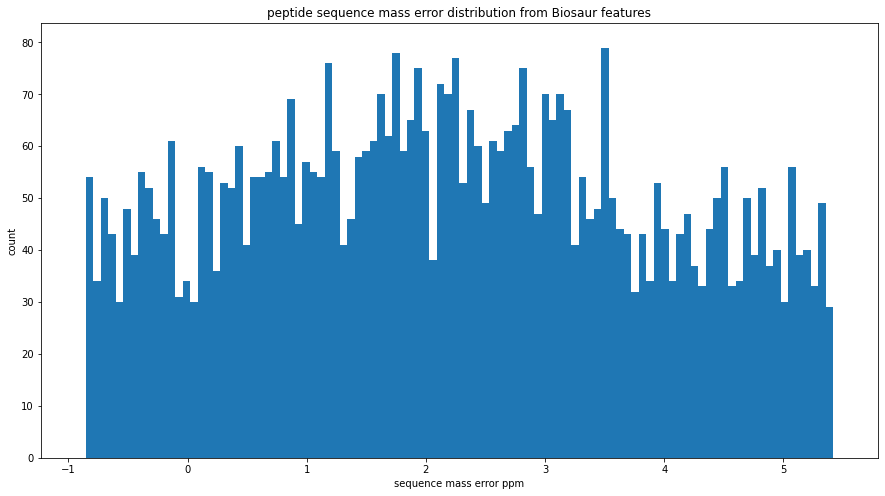

In [23]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('peptide sequence mass error distribution from Biosaur features')

bins = 100
hist, bins, _ = plt.hist(biosaur_unique_sequences_df['mass_diff'], bins=bins)
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

# plt.xlim((-2,7))
# plt.ylim((0,210))

plt.show()

##### 3DID

In [24]:
tdid_target_pfms_df = tdid_pfms_df[~tdid_pfms_df.proteins.str.contains('DECOY')]

In [25]:
tdid_target_pfms_df

,sequence,mass diff,RT diff,peak_id,Intensity,nScans,nIsotopes,proteins,m/z,RT,averagineCorr,charge,ion_mobility
0,ASLVSSSDGSFLADAHFAR,1.898343,17.567399,81608,3002,12,4,sp|Q8WZ75|ROBO4_HUMAN,969.46936,1985.9983,0.0,2,1.160069
1,ASLVSSSDGSFLADAHFAR,1.721359,17.567399,81647,3038,11,4,sp|Q8WZ75|ROBO4_HUMAN,969.46954,1985.9983,0.0,2,1.166150
2,ASLVSSSDGSFLADAHFAR,1.692438,59.371499,81361,3178,10,4,sp|Q8WZ75|ROBO4_HUMAN,969.46954,2027.8024,0.0,2,1.192988
3,ASLVSSSDGSFLADAHFAR,1.370403,59.371499,81179,4931,11,4,sp|Q8WZ75|ROBO4_HUMAN,969.46990,2027.8024,0.0,2,1.174256
4,ATQEPSEHGPWTLEQLR,2.275589,268.840487,84190,3692,7,4,sp|Q8WZ75|ROBO4_HUMAN,989.98224,2179.1646,0.0,2,1.192482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429060,MDSYVDQLQAQGGSMIMLAK,-0.575017,-231.337456,47597,2329,6,4,sp|P0AC33|FUMA_ECOLI,729.34827,1673.1990,0.0,3,0.931785
429061,SLECVEYPELGMEAIWK,-2.407172,223.040173,87464,2925,8,5,sp|P0AC33|FUMA_ECOLI,1027.48660,2195.0420,0.0,2,1.214231
429062,SVEGGAAFQTLITIAK,-2.372990,162.701834,59924,13939,10,4,sp|P45539|FRLA_ECOLI,803.44790,2080.1912,0.0,2,1.072713
429063,NTLTFGSIIWCR,1.855114,339.677112,49568,2286,6,4,sp|P45539|FRLA_ECOLI,734.37290,2261.7302,0.0,2,1.019719


In [26]:
len(tdid_target_pfms_df.sequence.unique())

168266

In [27]:
tdid_unique_sequences_l = []
for group_name,group_df in tdid_target_pfms_df.groupby(['sequence','charge']):
    mass_diff = group_df['mass diff'].min()
    tdid_unique_sequences_l.append({'sequence':group_name[0],'charge':group_name[1],'mass_diff':mass_diff})
tdid_unique_sequences_df = pd.DataFrame(tdid_unique_sequences_l)

In [28]:
tdid_unique_sequences_df

,sequence,charge,mass_diff
0,AAAAAAAAAAAAAAAAGATCLER,2,-2.820700
1,AAAAAAAAAAAAAAAASAGGK,2,-1.756482
2,AAAAAAAAAAAAAAAGAGAGAK,2,-1.489161
3,AAAAAAAAAAAAAAASGFAYPGTSER,2,-2.681166
4,AAAAAAAAAAAPPAPPEGASPGDSAR,2,0.031537
...,...,...,...
173158,YYYLAFTAHQTPLASK,2,-0.168906
173159,YYYNGFYLLWIDAK,2,2.049468
173160,YYYSDNFFDGQR,2,-1.882026
173161,YYYTFDNSLLFTESIQK,2,-2.796790


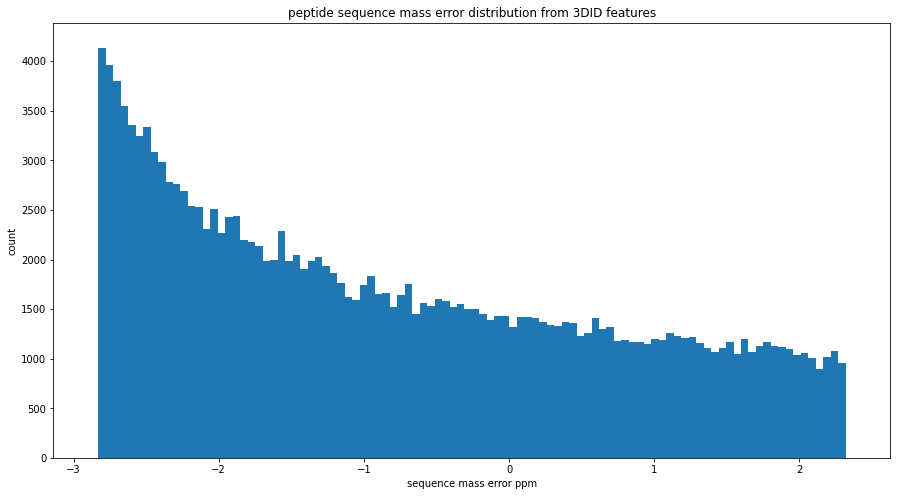

In [29]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('peptide sequence mass error distribution from 3DID features')

bins = 100
hist, bins, _ = plt.hist(tdid_unique_sequences_df['mass_diff'], bins=bins)
plt.xlabel('sequence mass error ppm')
plt.ylabel('count')

# plt.xlim((-2,7))
# plt.ylim((0,210))

plt.show()